<a href="https://colab.research.google.com/github/MKChou/10_6_Introduction_to_DL/blob/main/%E3%80%8C10_6_Introduction_to_DL%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages and check TF version

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


# Loading MNIST dataset

In [15]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#  Example of loading the mnist dataset

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


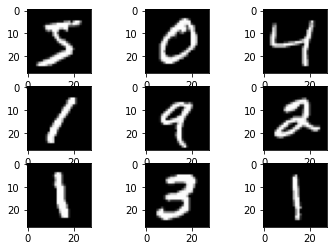

In [16]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images of training set
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# Build a simple MultiLayer Perceptron

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# Summarize and Plot model

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


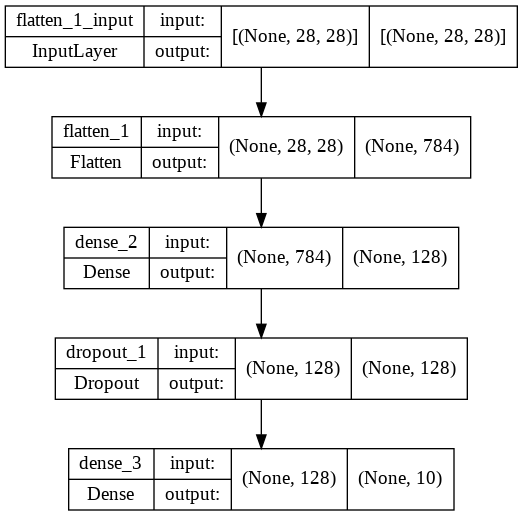

In [20]:
tf.keras.utils.plot_model(model, to_file="Computational_Graph.png", show_shapes=True)

# Prediction and check parameters out

In [21]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.6568295 ,  0.15896285, -0.366385  ,  0.12572461, -0.22051749,
         1.1355449 ,  0.8596511 , -0.18333893, -0.5266255 , -0.3141402 ]],
      dtype=float32)

In [22]:
tf.nn.softmax(predictions).numpy()

array([[0.04339286, 0.09810981, 0.0580172 , 0.09490241, 0.06712838,
        0.26051733, 0.19770491, 0.0696711 , 0.04942711, 0.06112887]],
      dtype=float32)

In [25]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [26]:
loss_fn(y_train[:1], predictions).numpy()

1.3450859

# Compile model before using it

In [28]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

[More details about SparseCategoricalCrossentropy](https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function)

In [29]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2929 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1407 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1039 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0735 - accuracy: 0.9766


# Evaluate model with training set

In [30]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0810 - accuracy: 0.9755 - 504ms/epoch - 2ms/step


[0.0809871256351471, 0.9754999876022339]

# Rebuild a model based on a pretrained model

In [31]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [32]:
probability_model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [33]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.25172592e-08, 1.47972905e-08, 3.46663069e-06, 1.11239833e-05,
        6.04864986e-12, 5.52260859e-09, 3.47642786e-13, 9.99979258e-01,
        6.56899246e-08, 6.16865600e-06],
       [1.90969773e-09, 8.63724927e-05, 9.99908209e-01, 5.32116610e-06,
        3.88982791e-13, 1.46880481e-07, 4.83157230e-08, 1.33867215e-13,
        8.70046790e-09, 7.66423437e-13],
       [2.52959779e-07, 9.98425245e-01, 1.89143379e-04, 1.03852608e-05,
        1.10762439e-05, 2.76385690e-05, 4.90976890e-06, 1.08295120e-03,
        2.48112425e-04, 3.43057138e-07],
       [9.98890936e-01, 5.60790397e-07, 2.14669752e-04, 3.10652308e-06,
        4.52447784e-05, 8.69592441e-06, 1.01888363e-04, 2.41784855e-05,
        1.84797187e-07, 7.10600114e-04],
       [8.80071411e-07, 1.16724075e-09, 2.14710076e-06, 8.94590642e-07,
        9.95756924e-01, 9.58300959e-08, 5.46044885e-06, 4.05795407e-04,
        1.25976203e-06, 3.82655696e-03]], dtype=float32)>

In [ ]:
probability_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4898 - accuracy: 0.9768
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4860 - accuracy: 0.9789
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4836 - accuracy: 0.9810
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4817 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4808 - accuracy: 0.9826


In [35]:
probability_model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.4934 - accuracy: 0.9755 - 402ms/epoch - 1ms/step


[1.4933741092681885, 0.9754999876022339]

# Plot testing set

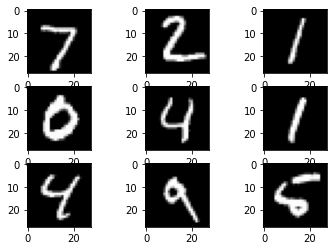

In [36]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## Predict test set with the model

In [37]:
pred = model.predict(x_test[:25])

In [38]:
np.argmax(pred, axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4])

In [39]:
pred_list= np.argmax(pred, axis=1)

In [40]:
for i in range(25):
    print("prediction:", y_test[i])

prediction: 7
prediction: 2
prediction: 1
prediction: 0
prediction: 4
prediction: 1
prediction: 4
prediction: 9
prediction: 5
prediction: 9
prediction: 0
prediction: 6
prediction: 9
prediction: 0
prediction: 1
prediction: 5
prediction: 9
prediction: 7
prediction: 3
prediction: 4
prediction: 9
prediction: 6
prediction: 6
prediction: 5
prediction: 4


## Check up on predictions

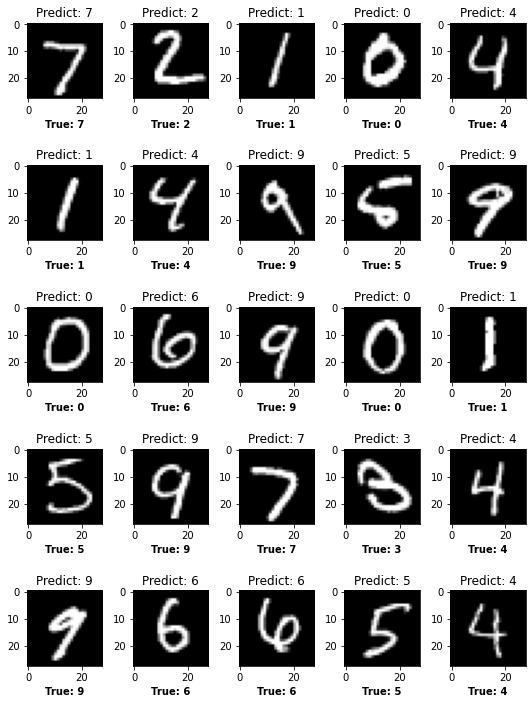

In [41]:
num_row = 5
num_col = 5 # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(25):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title('Predict: {}'.format(pred_list[i]))
    if(pred_list[i] != y_test[i]):
        ax.set_xlabel('True: {}'.format(y_test[i]), color='Red', fontdict=dict(weight='bold'))
    else:
        ax.set_xlabel('True: {}'.format(y_test[i]), color='black', fontdict=dict(weight='bold') )
plt.tight_layout()
plt.show()

# Comparison with loss function



> CategoricalCrossentropy





In [42]:
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

1.1769392



> SparseCategoricalCrossentropy



In [43]:
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_true, y_pred).numpy()

1.1769392

# Example of ReLU

In [44]:
foo = tf.constant([-10, -5, 0.0, 5, 10], dtype = tf.float32)

In [45]:
foo

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-10.,  -5.,   0.,   5.,  10.], dtype=float32)>

In [46]:
tf.keras.activations.relu(foo).numpy()

array([ 0.,  0.,  0.,  5., 10.], dtype=float32)

In [47]:
tf.keras.activations.relu(foo, alpha=0.5).numpy() # f(x) = alpha * x for x < 0, f(x) = x for x >= 0

array([-5. , -2.5,  0. ,  5. , 10. ], dtype=float32)

In [48]:
tf.keras.activations.relu?

# Example of softmax
The softmax of each vector x is computed as
`exp(x) / tf.reduce_sum(exp(x))`.

Softmax converts a vector of values to a probability distribution.
The elements of the output vector are in range (0, 1) and sum to 1


In [ ]:
inputs = tf.random.normal(shape=(3, 5))
outputs = tf.keras.activations.softmax(inputs)

In [ ]:
inputs

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.9322864 , -0.33996594, -1.116526  ,  0.87566936, -0.8631477 ],
       [-1.8972509 ,  0.30405876, -2.5357833 ,  0.50158286, -0.9673294 ],
       [ 0.62855124,  1.819423  ,  0.16648708, -0.2461492 , -0.13735281]],
      dtype=float32)>

In [ ]:
outputs

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0.09251148, 0.16727734, 0.07694517, 0.5641321 , 0.0991339 ],
       [0.04147735, 0.3748242 , 0.02190281, 0.45667922, 0.10511647],
       [0.17235942, 0.5670535 , 0.10858332, 0.07187161, 0.08013221]],
      dtype=float32)>

In [ ]:
inp = np.asarray([-6.9282, 2.1847])
layer = tf.keras.layers.Softmax()
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
layer(inp).numpy()

array([0.0001, 0.9999], dtype=float32)

# Simple expressions and interpretation of the gradient
[Ref](https://cs231n.github.io/optimization-2/#intuitive)

**Backpropagation** can thus be thought of as gates communicating to each other (through the gradient signal) whether they want their **outputs to increase or decrease (and how strongly)**, so as to make the final output value higher.

In [ ]:
import torch

In [ ]:
# set some inputs
x = -2; y = 5; z = -4

# perform the forward pass
q = x + y # q becomes 3
f = q * z # f becomes -12

# perform the backward pass (backpropagation) in reverse order:
# first backprop through f = q * z
dfdz = q # df/dz = q, so gradient on z becomes 3
dfdq = z # df/dq = z, so gradient on q becomes -4
dqdx = 1.0
dqdy = 1.0
# now backprop through q = x + y
dfdx = dfdq * dqdx  # The multiplication here is the chain rule!
dfdy = dfdq * dqdy
print("gradient of x =", dfdx)
print("gradient of y =", dfdy)
print("gradient of z =", dfdz)

gradient of x = -4.0
gradient of y = -4.0
gradient of z = 3


In [ ]:
x = torch.tensor(-2.0, requires_grad=True)
y = torch.tensor(5.0, requires_grad=True)
z = torch.tensor(-4.0, requires_grad=True)
f = (x+y)*z
f.backward()
print("gradient of x =", x.grad)
print("gradient of y =", y.grad)
print("gradient of z =", z.grad)

gradient of x = tensor(-4.)
gradient of y = tensor(-4.)
gradient of z = tensor(3.)


In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2
print("gradient of x =", x.grad)
y.backward()
print("gradient of x =", x.grad)
# y.backward(retain_graph=True)
# print("gradient of x =", x.grad)
# y.backward(retain_graph=True)
# print("gradient of x =", x.grad)

gradient of x = None
gradient of x = tensor(4.)


`To reduce memory usage, during the .backward() call, all the intermediary results are deleted when they are not needed anymore. Hence if you try to call .backward() again, the intermediary results don’t exist and the backward pass cannot be performed (and you get the error you see).`

In [ ]:
x = torch.tensor([1.0, 2.0],requires_grad=True)
y = (x + 2)**2
z = torch.mean(y)
z.backward(retain_graph=True)
# z.backward(retain_graph=True)
z.backward()
x.grad

tensor([6., 8.])